In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [10]:
#Import Model results
Results = pd.read_excel('Results Final.xlsx')

In [11]:
Results.head()

,Name,MSM Included,MSM Proportion,MSM,Platelets/Person,Plasma/Person,HIV Donations Detected,HIV Donations Undetected,Number of Infections from Transfusions,False Positives,Total RBC,Total Platelets,Eligibility,Unnamed: 13,TotRBC/100000,TotPlat/100000,(HIV Transmissions)/100000
0,7368601,0,0.031815,6363,2,1,7,2,4,19,11115,2942.4,0.38,NaN,5557.5,1471.2,2.0
1,7316865,0,0.027415,5483,2,4,9,1,3,15,11192,2892.4,0.38,NaN,5596.0,1446.2,1.5
2,1884559,0,0.008335,1667,1,4,2,1,2,1,2856,735.4,0.38,NaN,1428.0,367.7,1.0
3,3647578,0,0.028575,5715,2,2,5,1,2,21,11128,2934.4,0.38,NaN,5564.0,1467.2,1.0
4,4255039,0,0.023375,4675,4,2,7,1,2,20,11256,2924.6,0.38,NaN,5628.0,1462.3,1.0


([<matplotlib.axis.XTick at 0x1436a789988>,
 <a list of 2 Text xticklabel objects>)

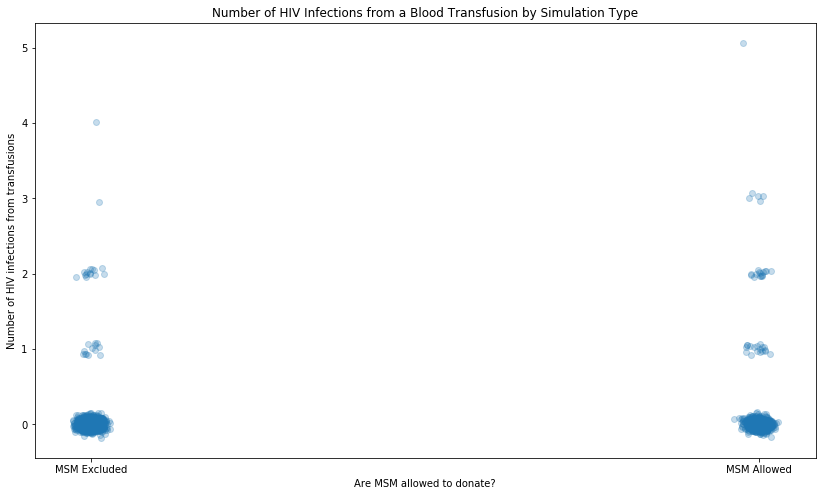

In [37]:
# plot the number of hive infections via transfusions 
# in each simulation vs whether gay men are excluded from donation or not

X = Results['MSM Included']+.01*np.random.randn(len(Results))
y = Results['Number of Infections from Transfusions']+.05*np.random.randn(len(Results))

fig = plt.figure(figsize=(14,8))
plt.scatter(X,y,alpha=.25)
plt.ylabel('Number of HIV infections from transfusions')
plt.xlabel('Are MSM allowed to donate?')
plt.title('Number of HIV Infections from a Blood Transfusion by Simulation Type')
plt.xticks([0,1], ('MSM Excluded','MSM Allowed'))

In [48]:
# OLS with Heteroskedastic robust standard errors
Transmissions=np.array(Results['(HIV Transmissions)/100000'])
Included=np.array(Results['MSM Included'])

#Heteroskedastic Standard Errors
reg = smf.ols('Transmissions ~ 1 + Included',data=Results).fit(cov_type='HC3')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          Transmissions   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.88
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           0.000579
Time:                        21:42:17   Log-Likelihood:                 783.77
No. Observations:                2103   AIC:                            -1564.
Df Residuals:                    2101   BIC:                            -1552.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0171      0.003      4.991      0.0

## The dummy variable designating exclusion of gay men increases the number of transmission by a small amount. That increase is negligible compared to the baseline HIV transmission rate